# Topic 2: Customer Clustering with RFM & Clustering Algorithm

# Business Objective/Problem
 - Công ty X chủ yếu bán các sản phẩm là quà 
tặng dành cho những dịp đặc biệt. Nhiều 
khách hàng của công ty là khách hàng bán 
buôn.
 - Công ty X mong muốn có thể bán được nhiều 
sản phẩm hơn cũng như giới thiệu sản phẩm 
đến đúng đối tượng khách hàng, chăm sóc và 
làm hài lòng khách hàng.

# Các kiến thức/ kỹ năng cần để giải quyết vấn đề này:
- Hiểu vấn đề
- Import các thư viện cần thiết và hiểu cách sử dụng
- Đọc dữ liệu (dữ liệu project này được cung cấp)
- Thực hiện EDA cơ bản (sử dụng Pandas Profiling Report)
- Tiền xử lý dữ liệu: làm sạch, tạo tính năng mới, lựa chọn tính năng cần thiết…

# Bước 1: Business Understanding
- Dựa vào mô tả nói trên => xác định vấn đề: 
    - Tìm ra giải pháp giúp cải thiện hiệu quả quảng bá, từ đó giúp tăng doanh thu bán hàng, cải thiện mức độ hài lòng của khách hàng. 
     - => Mục tiêu/ vấn đề: Xây dựng hệ thống phân cụm khách hàng dựa trên các thông tin do công ty cung cấp từ đó có thể giúp công ty xác định các nhóm khách hàng khác nhau để có chiến lược kinh doanh, chăm sóc khách hàng phù hợp.

# Bước 2: Data Understanding/ Acquire
- Từ mục tiêu/ vấn đề đã xác định: Xem xét các dữ
liệu cần thiết:
- Toàn bộ dữ liệu được lưu trữ trong tập tin
OnlineRetail.csv với 541.909 record chứa tất cả các giao
dịch xảy ra từ ngày 01/12/2010 đến 09/12/2011 đối với
bán lẻ trực tuyến.
- Mô tả dữ liệu:
https://archive.ics.uci.edu/ml/datasets/online+retail

# Attribute Information:

- InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely  assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
- StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
- Description: Product (item) name. Nominal.
- Quantity: The quantities of each product (item) per transaction. Numeric.
- InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
- UnitPrice: Unit price. Numeric, Product price per unit in sterling.
- CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
- Country: Country name. Nominal, the name of the country where each customer resides.



# Bước 3: Data preparation/ Prepare

In [1]:
! pip install pandas-profiling==2.7.1
! pip install squarify
! pip install plotly

     |████████████████████████████████| 252 kB 27.3 MB/s 
     |████████████████████████████████| 4.7 MB 21.6 MB/s 
     |████████████████████████████████| 675 kB 51.9 MB/s 
     |████████████████████████████████| 58 kB 5.8 MB/s 
     |████████████████████████████████| 812 kB 40.7 MB/s 
     |████████████████████████████████| 38.1 MB 5.8 MB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=6f50d6bd8003377f4ab6af06f7925743de6700d3a333cdab92a47650873d9772
  Stored in directory: /root/.cache/pip/wheels/70/e1/52/5b14d250ba868768823940c3229e9950d201a26d0bd3ee8655
  Created wheel for imagehash: filename=ImageHash-4.2.1-py2.py3-none-any.whl size=295207 sha256=ac3931bb9e4ce18c18dfb532bef77c152c9ae1537314a8323e0b9a89cc05796c
  Stored in directory: /root/.cache/pip/wheels/4c/d5/59/5e3e297533ddb09407769762985d134135064c6831e29a914e
Successfully built htmlmin imagehash
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalli

In [2]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [3]:
%cd '/content/gdrive/My Drive/LDS0_K271_PhamThiHoa/Project_2'

/content/gdrive/My Drive/LDS0_K271_PhamThiHoa/Project_2


In [4]:
# Import thư viện
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.express as px
import squarify
from sklearn.preprocessing import RobustScaler
from pandas_profiling import ProfileReport
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
from datetime import  datetime

In [5]:
# Read data
data = pd.read_csv('OnlineRetail.csv', encoding = 'unicode-escape')

In [6]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [7]:
data.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,09-12-2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,09-12-2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,09-12-2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,09-12-2011 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,09-12-2011 12:50,4.95,12680.0,France


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


# 1. Kiểm tra dữ liệu: EDA

In [9]:
# Use dataframe df
df = data.copy (deep = True)

In [10]:
ProfileReport(df)

Summarize dataset:   0%|          | 0/20 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

- From ProfileReport, we can see:
    - Number of observations:	541909
    - Missing cells	136534
    - Duplicate rows	4837

In [11]:
# We can check again
df.isnull().any()

InvoiceNo      False
StockCode      False
Description     True
Quantity       False
InvoiceDate    False
UnitPrice      False
CustomerID      True
Country        False
dtype: bool

In [12]:
df.isna().any()

InvoiceNo      False
StockCode      False
Description     True
Quantity       False
InvoiceDate    False
UnitPrice      False
CustomerID      True
Country        False
dtype: bool

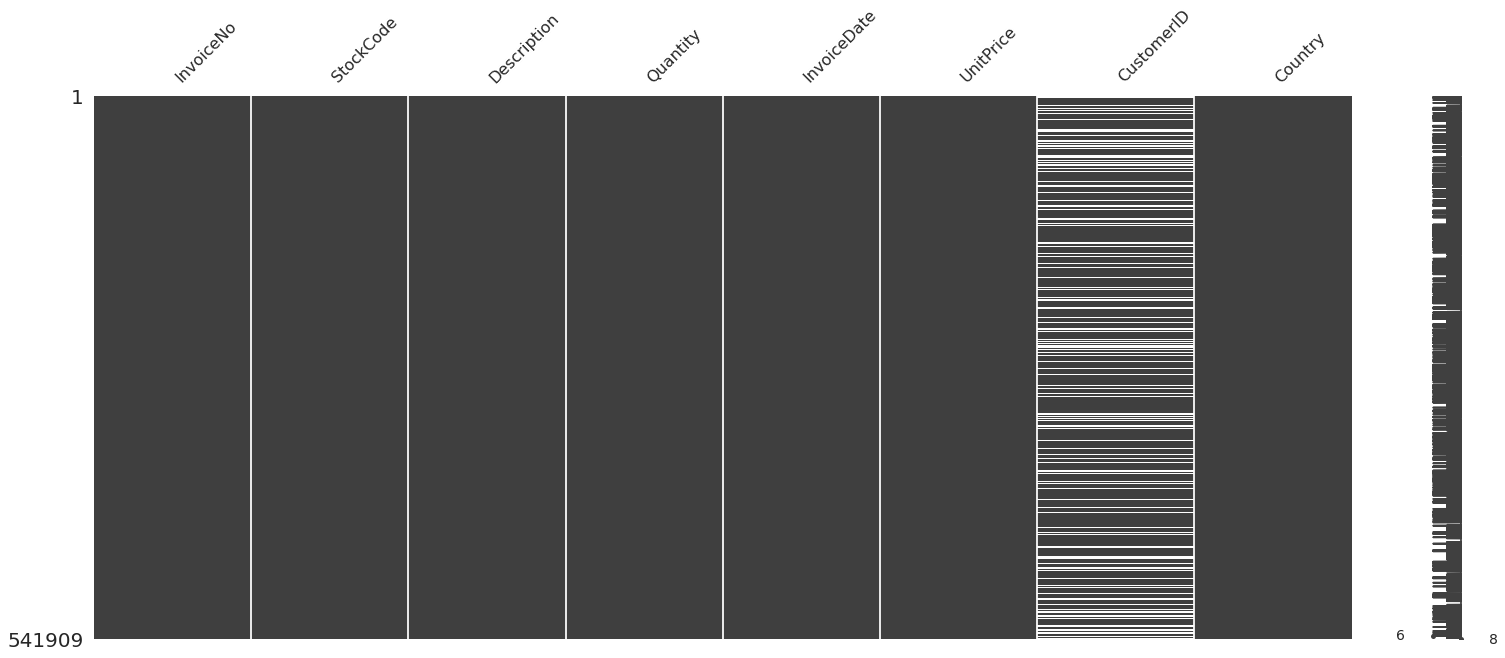

In [13]:
msno.matrix(df)

In [14]:
# Drop duplicates
df = df.drop_duplicates()

- Missing value of column Description is less than 1%
- Missing value of column CustomerID is approximately 25%
- Because this is a customer segmentation problem. So we decided to delete all the data that is missing value CustomerID

## 1. Quantity - UnitPrice - CustomerID

In [15]:
df = df.dropna(subset=['CustomerID'])

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401604 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    401604 non-null  object 
 1   StockCode    401604 non-null  object 
 2   Description  401604 non-null  object 
 3   Quantity     401604 non-null  int64  
 4   InvoiceDate  401604 non-null  object 
 5   UnitPrice    401604 non-null  float64
 6   CustomerID   401604 non-null  float64
 7   Country      401604 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.6+ MB


- Now Data have no missing values

In [17]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,401604.000000,401604.000000,401604.000000
mean,12.183273,3.474064,15281.160818
std,250.283037,69.764035,1714.006089
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13939.000000
50%,5.000000,1.950000,15145.000000
75%,12.000000,3.750000,16784.000000
max,80995.000000,38970.000000,18287.000000


- From describe tabel, we can see Quantity have the negative values which are not possible values for price and quantity
- => Delete Quantity's negative values
- Beside, the UnitPrice have the zeros price which doesn't bring usefull information to analysis
- => Delete the zeros price

In [18]:
# Delete Quantity negative values
df = df[df['Quantity']>0]
# Delete UnitPrice negative values
df = df[df['UnitPrice'] > 0]
df.shape

(392692, 8)

In [19]:
# Make a check with the invoice cancalled
df[df.InvoiceNo.str.contains('C',case=False)].head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


- After removing negative values and zero values of Quantity and Unit Price, Out of invoice is canceled too.

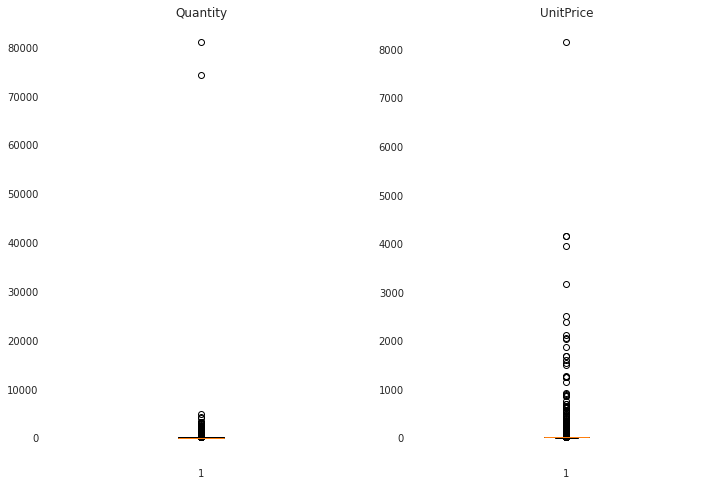

In [20]:
plt.figure(figsize = (12,8))
plt.subplot(1,2,1)
plt.boxplot(x=df['Quantity'])
plt.title('Quantity')
plt.subplot(1,2,2)
plt.boxplot(x=df['UnitPrice'])
plt.title('UnitPrice')
plt.show()

In [21]:

def xulyngoaile(df,i):
  Q1 = np.percentile(df[i],25)
  Q3 = np.percentile(df[i],75)
  i_IQR = Q3 - Q1
  up = Q3 + i_IQR*1.5
  down = Q1 - i_IQR*1.5
  upoutlier = df[df[i] > up]
  downoutlier = df[df[i] < down]
  return upoutlier,downoutlier

In [22]:
up_quantity, dow_quantity  = xulyngoaile(df,'Quantity')
print(f'Upoutlier - Quantity: {up_quantity.shape[0]}, Rate: {up_quantity.shape[0]/df.shape[0]*100:.2f} %')
print(f'Dowoutlier - Quantity: {dow_quantity.shape[0]}, Rate: {dow_quantity.shape[0]/df.shape[0]*100:.2f} %')
up_quantity.sort_values('Quantity', ascending = False).head(5)

Upoutlier - Quantity: 25616, Rate: 6.52 %
Dowoutlier - Quantity: 0, Rate: 0.00 %


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,09-12-2011 09:15,2.08,16446.0,United Kingdom
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,18-01-2011 10:01,1.04,12346.0,United Kingdom
421632,573008,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,4800,27-10-2011 12:26,0.21,12901.0,United Kingdom
206121,554868,22197,SMALL POPCORN HOLDER,4300,27-05-2011 10:52,0.72,13135.0,United Kingdom
97432,544612,22053,EMPIRE DESIGN ROSETTE,3906,22-02-2011 10:43,0.82,18087.0,United Kingdom


In [23]:
up_UnitPrice, dow_UnitPrice  = xulyngoaile(df,'UnitPrice')
print(f'Upoutlier - UnitPrice: {up_UnitPrice.shape[0]}, Rate: {up_UnitPrice.shape[0]/df.shape[0]*100:.2f} %')
print(f'Dowoutlier - UnitPrice: {dow_UnitPrice.shape[0]}. Rate: {dow_UnitPrice.shape[0]/df.shape[0]*100:.2f} %')
up_quantity.sort_values('UnitPrice', ascending = False).head(5)

Upoutlier - UnitPrice: 34112, Rate: 8.69 %
Dowoutlier - UnitPrice: 0. Rate: 0.00 %


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
222680,556444,22502,PICNIC BASKET WICKER 60 PIECES,60,10-06-2011 15:28,649.50,15098.0,United Kingdom
16441,537659,22833,HALL CABINET WITH 3 DRAWERS,72,07-12-2010 16:43,32.69,18102.0,United Kingdom
411233,572209,23485,BOTANICAL GARDENS WALL CLOCK,120,21-10-2011 12:08,20.80,18102.0,United Kingdom
20528,538063,22830,UTILTY CABINET WITH HOOKS,96,09-12-2010 13:44,19.94,18102.0,United Kingdom
16426,537657,22830,UTILTY CABINET WITH HOOKS,30,07-12-2010 16:42,19.84,18102.0,United Kingdom



- All negative and zero values of Quantity and Unit Price have been removed from the data
- Quantity and UnitPrice have a lot of outlier, however we will not remove outlier.There will be many organizations and individuals who buy a lot.
As for the price, it is also possible to have an item with a higher price than others

## 2. StockCode and Description

- Make a check with Description and StockCode
- If each code has a different description, then redo it to match

In [24]:
print(f'We have {len(df.StockCode.unique())} StockCode\nAnd {len(df.Description.unique())} Decription')

We have 3665 StockCode
And 3877 Decription


In [25]:
df['Description'] = df['Description'].str.lower().replace(to_replace=r'[^\w\s]', value='', regex=True)

- We should make it to math, each StockCode with 1 Decription.
- However, when building the model, we do not choose to use the data of these two columns, so we temporarily ignore this data processing part.

## 3. InvoiceDate

In [26]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [27]:
# Create features Year, Month:
df['Month'] = pd.DatetimeIndex(df['InvoiceDate']).month
df['Year'] = pd.DatetimeIndex(df['InvoiceDate']).year
# MonthYear
df['MonthYear'] = pd.to_datetime(df[['Year', 'Month']].assign(Day=1))
# DayofWeek
df['Day_name'] = df['InvoiceDate'].dt.day_name()
days = {'Monday': 0,'Tuesday': 1,'Wednesday':2,'Thursday':3,'Friday':4,'Saturday':5,'Sunday':6}
df['DayofWeek'] = df['Day_name'].apply(lambda x: days[x])
# Hour
df['Hour'] = df['InvoiceDate'].dt.hour

In [28]:
df['Day_name'].unique()

array(['Tuesday', 'Friday', 'Wednesday', 'Saturday', 'Monday', 'Thursday',
       'Sunday'], dtype=object)

In [29]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Year,MonthYear,Day_name,DayofWeek,Hour
0,536365,85123A,white hanging heart tlight holder,6,2010-01-12 08:26:00,2.55,17850.0,United Kingdom,1,2010,2010-01-01,Tuesday,1,8
1,536365,71053,white metal lantern,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,1,2010,2010-01-01,Tuesday,1,8
2,536365,84406B,cream cupid hearts coat hanger,8,2010-01-12 08:26:00,2.75,17850.0,United Kingdom,1,2010,2010-01-01,Tuesday,1,8
3,536365,84029G,knitted union flag hot water bottle,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,1,2010,2010-01-01,Tuesday,1,8
4,536365,84029E,red woolly hottie white heart,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,1,2010,2010-01-01,Tuesday,1,8


Month/
       InvoiceNo
Month           
1          26769
2          24417
3          28188
4          26915
5          32154
6          34077
7          33039
8          31172
9          39261
10         43825
11         53709
12         19166


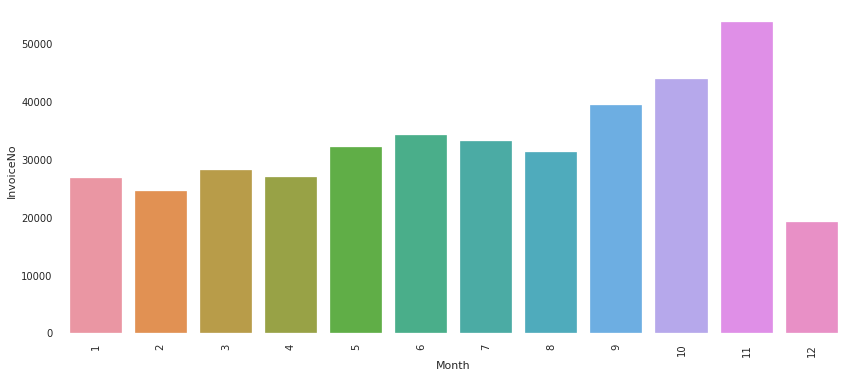

--------------------
Day_name/
           InvoiceNo
Day_name            
Friday         56316
Monday         59663
Saturday       22737
Sunday         60074
Thursday       70691
Tuesday        66153
Wednesday      57058


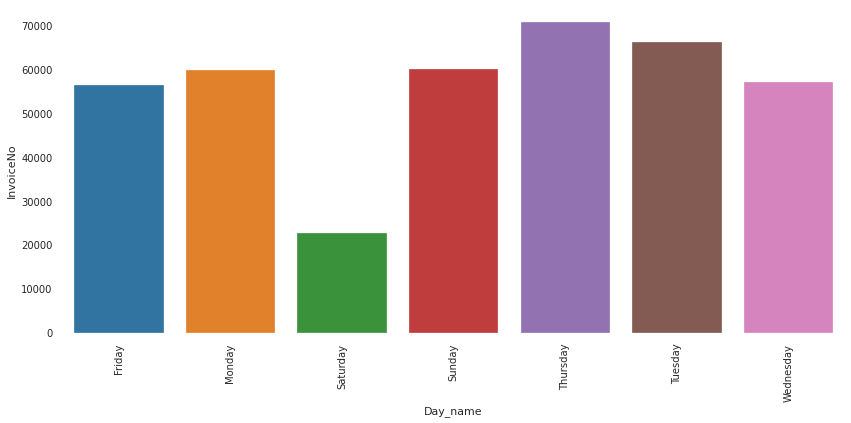

--------------------
Hour/
      InvoiceNo
Hour           
6             1
7           379
8          8687
9         21927
10        37773
11        48365
12        70938
13        63019
14        53251
15        44790
16        23715
17        12941
18         2895
19         3233
20          778


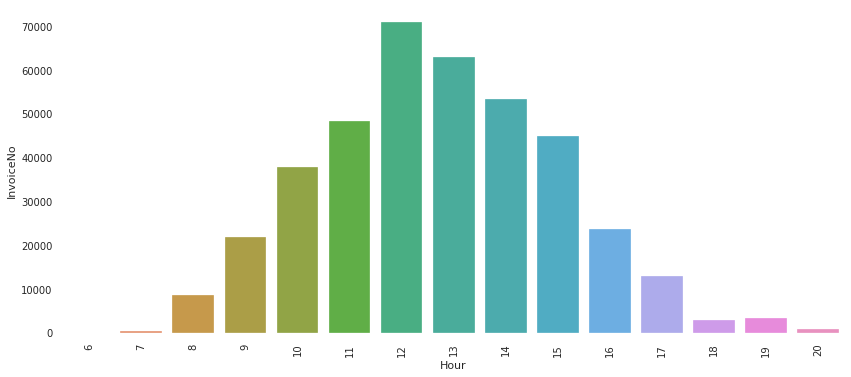

--------------------
Country/
                      InvoiceNo
Country                        
Australia                  1181
Austria                     398
Bahrain                      17
Belgium                    2031
Brazil                       32
Canada                      151
Channel Islands             747
Cyprus                      603
Czech Republic               25
Denmark                     380
EIRE                       7226
European Community           60
Finland                     685
France                     8326
Germany                    9025
Greece                      145
Iceland                     182
Israel                      245
Italy                       758
Japan                       321
Lebanon                      45
Lithuania                    35
Malta                       112
Netherlands                2359
Norway                     1071
Poland                      330
Portugal                   1453
RSA                          57
Saudi Arab

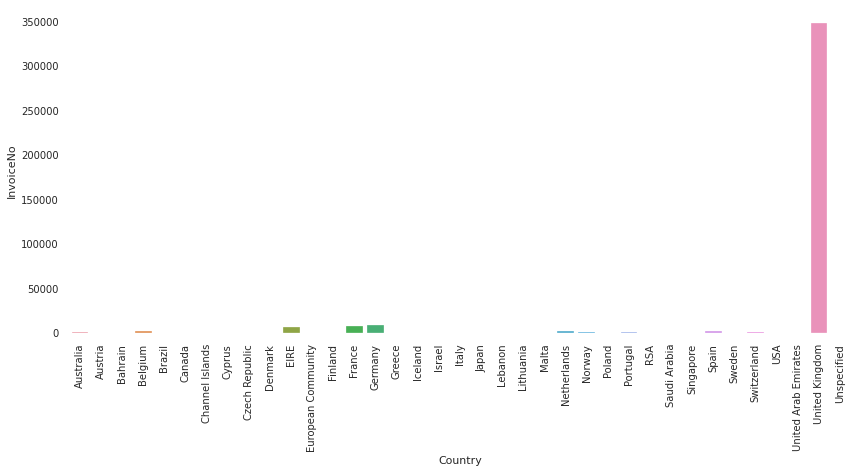

--------------------


In [30]:
for i in ['Month', 'Day_name','Hour', 'Country']:
  table = pd.DataFrame(df.groupby([i])['InvoiceNo'].count())
  print(f'{i}/\n{table}')
  plt.figure(figsize = (14,6))
  sns.barplot(table.index,table['InvoiceNo'])
  plt.xticks(rotation = 90)
  plt.show()
  print('-'*20)

In [31]:
# Rate of customers in the UK
df[df['Country'] == 'United Kingdom'].shape[0]/df.shape[0]

0.8892541737544947

- Month: Orders are high in October and November, low in December, the rest of the year is the same
- DayofWeek: Number of buying on Saturday is much less than other days of the week. The rest of the days, the InvoiceNo is almost the same
- Hour: Orders a lot at noon and lower in the morning and evening.
- Country: Most of the customers are in the UK (> 88%), customers in other countries account for less than 12%

In [32]:
# Creat new column GrossSales = UnitPrice*Quantity
df['GrossSales'] = df['UnitPrice']*df['Quantity']

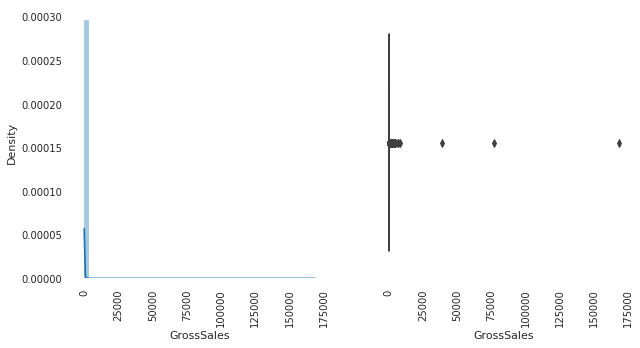

--------------------


In [33]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.distplot(df['GrossSales'])
plt.xticks(rotation = 90)
plt.subplot(1,2,2)
sns.boxplot(df['GrossSales'])
plt.xticks(rotation = 90)
plt.show()
print('-'*20)

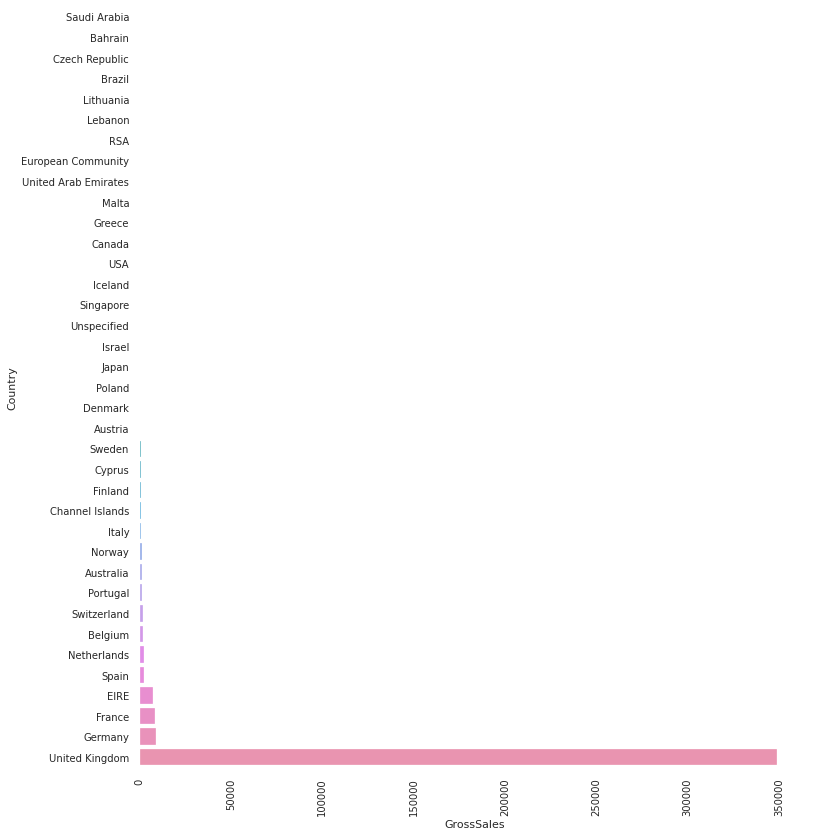

--------------------


In [34]:
table = pd.DataFrame(df.groupby(['Country'])['GrossSales'].count()).sort_values('GrossSales')
plt.figure(figsize = (12,14))
sns.barplot(table['GrossSales'],table.index)
plt.xticks(rotation = 90)
plt.show()
print('-'*20)

- Revenue mainly comes from the UK

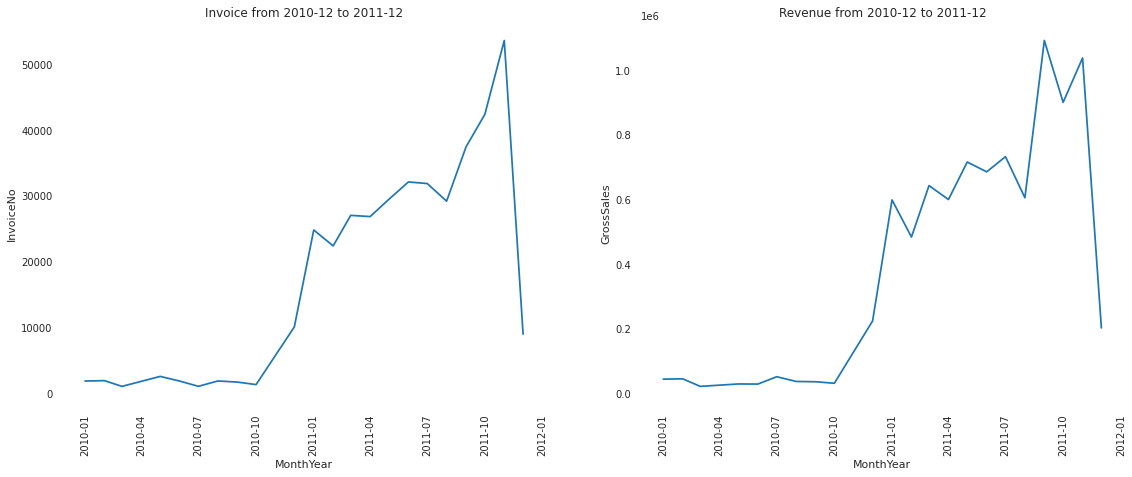

In [35]:
table1 = pd.DataFrame(df.groupby(['MonthYear'])['InvoiceNo'].count()).reset_index()
table2 = pd.DataFrame(df.groupby(['MonthYear'])['GrossSales'].sum()).reset_index()
plt.figure(figsize = (19,7))
plt.subplot(1,2,1)
sns.lineplot(x="MonthYear", y="InvoiceNo", data = table1)
plt.xticks(rotation = 90)
plt.title("Invoice from 2010-12 to 2011-12")
plt.subplot(1,2,2)
sns.lineplot(x="MonthYear", y="GrossSales", data = table2)
plt.xticks(rotation = 90)
plt.title("Revenue from 2010-12 to 2011-12")
plt.show()

In [36]:
df['InvoiceDate'].max()

Timestamp('2011-12-10 17:19:00')

- The number of orders and sales were mostly flat from the beginning of 2010 to October 2010, then increased sharply until the end of 2011
- In the chart, the December 2010 figures are low because the data is missing last 20 days of the month (12-2011)

In [37]:
# Let’s take a closer look at the data we will need to manipulate.
print('Transactions timeframe from {} to {}'.format(df['InvoiceDate'].min(), df['InvoiceDate'].max()))
print('{:,} transactions don\'t have a CustomerID'.format(df[df.CustomerID.isnull()].shape[0]))
print('{:,} unique CustomerID'.format(len(df.CustomerID.unique())))

Transactions timeframe from 2010-01-12 08:26:00 to 2011-12-10 17:19:00
0 transactions don't have a CustomerID
4,338 unique CustomerID


# Create RFM analysis for each customers

In [38]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Year,MonthYear,Day_name,DayofWeek,Hour,GrossSales
0,536365,85123A,white hanging heart tlight holder,6,2010-01-12 08:26:00,2.55,17850.0,United Kingdom,1,2010,2010-01-01,Tuesday,1,8,15.30
1,536365,71053,white metal lantern,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,1,2010,2010-01-01,Tuesday,1,8,20.34
2,536365,84406B,cream cupid hearts coat hanger,8,2010-01-12 08:26:00,2.75,17850.0,United Kingdom,1,2010,2010-01-01,Tuesday,1,8,22.00
3,536365,84029G,knitted union flag hot water bottle,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,1,2010,2010-01-01,Tuesday,1,8,20.34
4,536365,84029E,red woolly hottie white heart,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,1,2010,2010-01-01,Tuesday,1,8,20.34


In [39]:
# RFC
# Convert string to date, get max date of dataframe
max_date = df['InvoiceDate'].max().date()

Recency = lambda x : (max_date - x.max().date()).days
Frequency  = lambda x: len(x.unique())
Monetary = lambda x : round(sum(x), 2)

df_RFM = df.groupby('CustomerID').agg({'InvoiceDate': Recency,
                                        'InvoiceNo': Frequency,  
                                        'GrossSales': Monetary })

In [40]:
df_RFM.head()

,InvoiceDate,InvoiceNo,GrossSales
CustomerID,,,
12346.0,326,1,77183.60
12347.0,40,7,4310.00
12348.0,76,4,1797.24
12349.0,19,1,1757.55
12350.0,311,1,334.40


In [41]:
# Rename the columns of DataFrame
df_RFM.columns = ['Recency', 'Frequency', 'Monetary']
# Descending Sorting 
df_RFM = df_RFM.sort_values('Monetary', ascending=False)

In [42]:
df_RFM.head()

,Recency,Frequency,Monetary
CustomerID,,,
14646.0,2,73,280206.02
18102.0,12,60,259657.30
17450.0,3,46,194390.79
16446.0,89,2,168472.50
14911.0,0,201,143711.17


Recency /



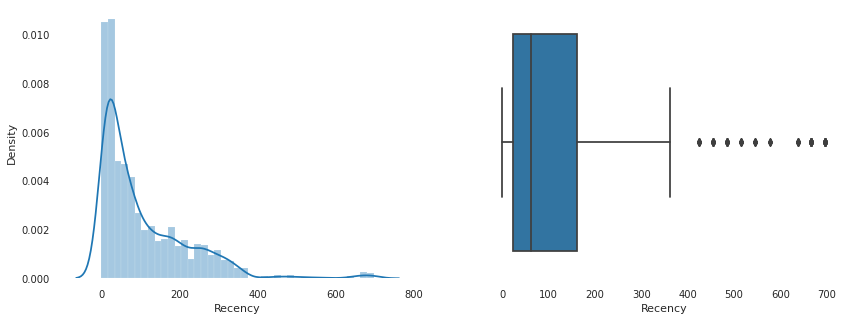

--------------------
Frequency /



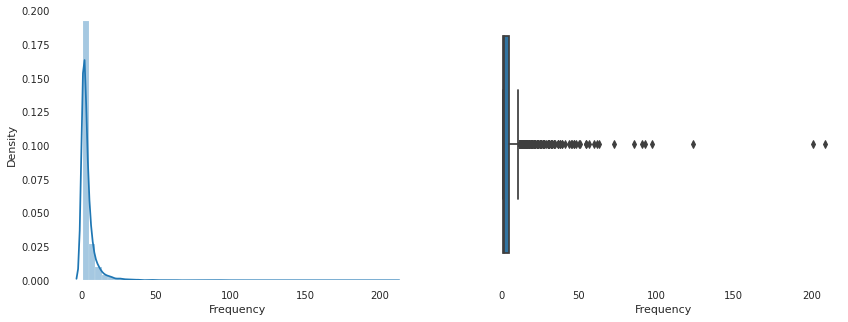

--------------------
Monetary /



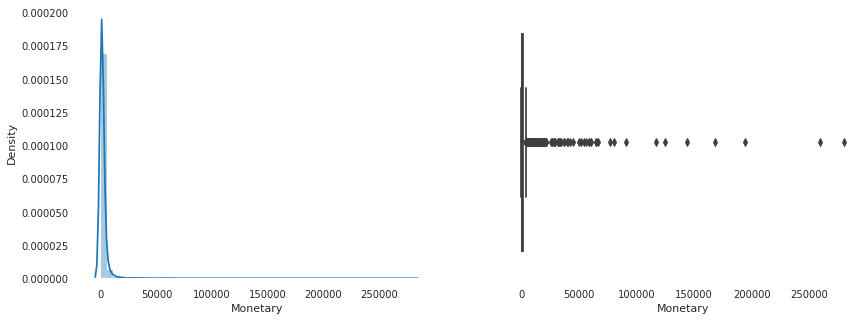

--------------------


In [43]:
for i in ['Recency', 'Frequency', 'Monetary']:
  print( i, '/\n')
  plt.figure(figsize=(14,5))
  plt.subplot(1,2,1)
  sns.distplot(df_RFM[i])
  plt.subplot(1,2,2)
  sns.boxplot(df_RFM[i])
  plt.show()
  print('-'*20)


- Recency, Frequency, Monetary: right skew

# Calculate RFM quartiles

In [44]:
# Create labels for Recency, Frequency, Monetary
r_labels = range(5, 0, -1)
f_labels = range(1, 6)
m_labels = range(1, 6)

In [45]:
# Assign these labels to 4 equal percentile groups 
r_groups = pd.qcut(df_RFM['Recency'].rank(method='first'), q=5, labels=r_labels)

f_groups = pd.qcut(df_RFM['Frequency'].rank(method='first'), q=5, labels=f_labels)
 
m_groups = pd.qcut(df_RFM['Monetary'].rank(method='first'), q=5, labels=m_labels)

In [46]:
# Create new columns R, F, M
df_RFM = df_RFM.assign(R = r_groups.values, F = f_groups.values,  M = m_groups.values)
df_RFM.head()

,Recency,Frequency,Monetary,R,F,M
CustomerID,,,,,,
14646.0,2,73,280206.02,5,5,5
18102.0,12,60,259657.30,5,5,5
17450.0,3,46,194390.79,5,5,5
16446.0,89,2,168472.50,2,2,5
14911.0,0,201,143711.17,5,5,5


# Concat RFM quartile values to create RFM Segments

In [47]:
def join_rfm(x): return str(int(x['R'])) + str(int(x['F'])) + str(int(x['M']))
df_RFM['RFM_Segment'] = df_RFM.apply(join_rfm, axis=1)


In [48]:
df_RFM.head()

,Recency,Frequency,Monetary,R,F,M,RFM_Segment
CustomerID,,,,,,,
14646.0,2,73,280206.02,5,5,5,555
18102.0,12,60,259657.30,5,5,5,555
17450.0,3,46,194390.79,5,5,5,555
16446.0,89,2,168472.50,2,2,5,225
14911.0,0,201,143711.17,5,5,5,555


## Count num of unique segments

In [49]:
rfm_count_unique = df_RFM.groupby('RFM_Segment')['RFM_Segment'].nunique()

In [50]:
print(rfm_count_unique.sum())

111


Having 111 different segments using the concatenate method quickly becomes unwieldy for any practical use. We will need a more concise way to define our segments.

# Calculate RFM score and level

In [51]:
# Calculate RFM_Score
df_RFM['RFM_Score'] = df_RFM[['R','F','M']].sum(axis=1)
df_RFM.head()

,Recency,Frequency,Monetary,R,F,M,RFM_Segment,RFM_Score
CustomerID,,,,,,,,
14646.0,2,73,280206.02,5,5,5,555,15
18102.0,12,60,259657.30,5,5,5,555,15
17450.0,3,46,194390.79,5,5,5,555,15
16446.0,89,2,168472.50,2,2,5,225,9
14911.0,0,201,143711.17,5,5,5,555,15


In [52]:
df_RFM.RFM_Segment.unique()

array(['555', '225', '455', '115', '355', '435', '335', '255', '445',
       '235', '545', '345', '525', '325', '535', '215', '155', '135',
       '245', '315', '145', '125', '425', '354', '544', '454', '344',
       '554', '144', '314', '334', '124', '444', '244', '214', '254',
       '424', '224', '114', '534', '324', '434', '234', '414', '134',
       '524', '154', '514', '433', '523', '143', '413', '323', '533',
       '343', '133', '333', '233', '223', '113', '443', '423', '513',
       '553', '543', '313', '123', '213', '353', '253', '243', '453',
       '112', '432', '212', '232', '132', '242', '332', '542', '342',
       '312', '442', '142', '532', '512', '412', '552', '452', '111',
       '311', '341', '211', '511', '231', '331', '411', '131', '431',
       '241', '531', '141', '441', '321', '121', '521', '221', '421',
       '541', '551', '251'], dtype=object)

# Manual Segmentation

Proposed RFM Model:
-----------
|Segment| Description  |Possible RFM 
|:---|:---|:---
| Champions  |  Bought recently, order often, and spend the most.	 | 555, 554, 544, 545, 454, 455, 445
| Loyal  |  Orders regularly. Responsive to promotions. | 543, 444, 435, 355, 354, 345, 344, 335
| Potential Loyalist  | Recent customers, and spent a good amount  |553, 551, 552, 541, 542, 533, 532, 531, 452, 451, 442, 441, 431, 453, 433, 432, 423, 353, 352, 351, 342, 341, 333, 323
| New Customers	  | Bought most recently | 512, 511, 422, 421 412, 411, 311
| Promising  | Potential loyalist a few months ago. Spends frequently and a good amount. But the last purchase was several weeks ago.   |525, 524, 523, 522, 521, 515, 514, 513, 425,424, 413,414,415, 315, 314, 313
|Need Attention  |  Core customers whose last purchase happened more than one month ago.|535, 534, 443, 434, 343, 334, 325, 324
| About To Sleep  | Made the largest orders, and often. But haven’t returned for a long time. | 331, 321, 312, 221, 213, 231, 241, 251
| At Risk  | Similar to “Can’t lose them but losing” but with smaller monetary and frequency value. | 255, 254, 245, 244, 253, 252, 243, 242, 235, 234, 225, 224, 153, 152, 145, 143, 142, 135, 134, 133, 125, 124
| Cannot Lose Them | Made the largest orders, and often. But haven’t returned for a long time. | 155, 154, 144, 214,215,115, 114, 113
| Hibernating customers  | Customer's shopped long ago but with less frequency and monetary value | 332, 322, 233, 232, 223, 222, 132, 123, 122, 212, 211
| Lost customers  | Made last purchase a long time ago and didn’t engage at all in the last 4 weeks.  |111, 112, 121, 131,141,151

- Referance: https://shopup.me/model/rfm-segmentation/

In [53]:
def RFM_Segment(df):
    if df['RFM_Segment'] in ['555', '554', '544', '545', '454', '455', '445']:
        return 'Champions'
    elif df['RFM_Segment'] in ['543', '444', '435', '355', '354', '345', '344', '335']:
        return 'Loyal'
    elif df['RFM_Segment'] in ['512', '511', '422', '421', '412', '411', '311']:
        return 'New Customers'
    elif df['RFM_Segment'] in ['553', '551', '552', '541', '542', '533', '532', '531', '452', '451', '442', '441', '431', '453', '433', '432', '423', '353', '352', '351', '342', '341', '333', '323']:
        return 'Potential Loyalist'
    elif df['RFM_Segment'] in ['525', '524', '523', '522', '521', '515', '514', '513', '425','424', '413','414','415', '315', '314', '313']:
        return 'Promising'
    elif df['RFM_Segment'] in ['535', '534', '443', '434', '343', '334', '325', '324']:
        return 'Need Attention'
    elif df['RFM_Segment'] in ['331', '321', '312', '221', '213', '231', '241', '251']:
        return 'About To Sleep'
    elif df['RFM_Segment'] in ['255', '254', '245', '244', '253', '252', '243', '242', '235', '234', '225', '224', '153', '152', '145', '143', '142', '135', '134', '133', '125', '124']:
        return 'At Risk'
    elif df['RFM_Segment'] in ['155', '154', '144', '214','215','115', '114', '113']:
        return 'Cannot Lose Them'
    elif df['RFM_Segment'] in ['332', '322', '233', '232', '223', '222', '132', '123', '122', '212', '211']:
        return 'Hibernating customers'
    elif df['RFM_Segment'] in ['111', '112', '121', '131','141','151']:
        return 'Lost customers'

In [54]:
df_RFM['Segment'] = df_RFM.apply(RFM_Segment, axis=1)

In [55]:
df_RFM.head()

,Recency,Frequency,Monetary,R,F,M,RFM_Segment,RFM_Score,Segment
CustomerID,,,,,,,,,
14646.0,2,73,280206.02,5,5,5,555,15,Champions
18102.0,12,60,259657.30,5,5,5,555,15,Champions
17450.0,3,46,194390.79,5,5,5,555,15,Champions
16446.0,89,2,168472.50,2,2,5,225,9,At Risk
14911.0,0,201,143711.17,5,5,5,555,15,Champions


In [56]:
# Print the header with top 5 rows 
df_RFM[::1000]

,Recency,Frequency,Monetary,R,F,M,RFM_Segment,RFM_Score,Segment
CustomerID,,,,,,,,,
14646.0,2,73,280206.02,5,5,5,555,15,Champions
13562.0,82,3,1799.33,3,3,4,334,10,Need Attention
14234.0,23,4,754.12,4,4,3,443,11,Need Attention
17948.0,148,1,358.56,2,1,2,212,5,Hibernating customers
14247.0,190,1,136.77,1,2,1,121,4,Lost customers


## Number of segments

In [57]:
df_RFM['Segment'].value_counts()

Champions                818
Lost customers           558
About To Sleep           452
At Risk                  448
Hibernating customers    413
Potential Loyalist       410
Loyal                    396
Need Attention           323
Promising                204
New Customers            191
Cannot Lose Them         125
Name: Segment, dtype: int64

## Calculate mean values for each segment

In [58]:
# Calculate average values for each RFM_Level, and return a size of each segment 
rfm_agg = df_RFM.groupby('Segment').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': ['mean', 'count']}).round(0)

rfm_agg.columns = rfm_agg.columns.droplevel()
rfm_agg.columns = ['RecencyMean','FrequencyMean','MonetaryMean', 'Count']
rfm_agg['Percent'] = round((rfm_agg['Count']/rfm_agg.Count.sum())*100, 2)

# Reset the index
rfm_agg = rfm_agg.reset_index()

In [59]:
rfm_agg

,Segment,RecencyMean,FrequencyMean,MonetaryMean,Count,Percent
0,About To Sleep,103.0,1.0,245.0,452,10.42
1,At Risk,160.0,4.0,1925.0,448,10.33
2,Cannot Lose Them,268.0,2.0,1905.0,125,2.88
3,Champions,15.0,12.0,6745.0,818,18.86
4,Hibernating customers,152.0,2.0,450.0,413,9.52
5,Lost customers,310.0,1.0,220.0,558,12.86
6,Loyal,46.0,6.0,2608.0,396,9.13
7,Need Attention,41.0,3.0,1111.0,323,7.45
8,New Customers,29.0,1.0,241.0,191,4.40
9,Potential Loyalist,32.0,3.0,519.0,410,9.45


## TREEMAP

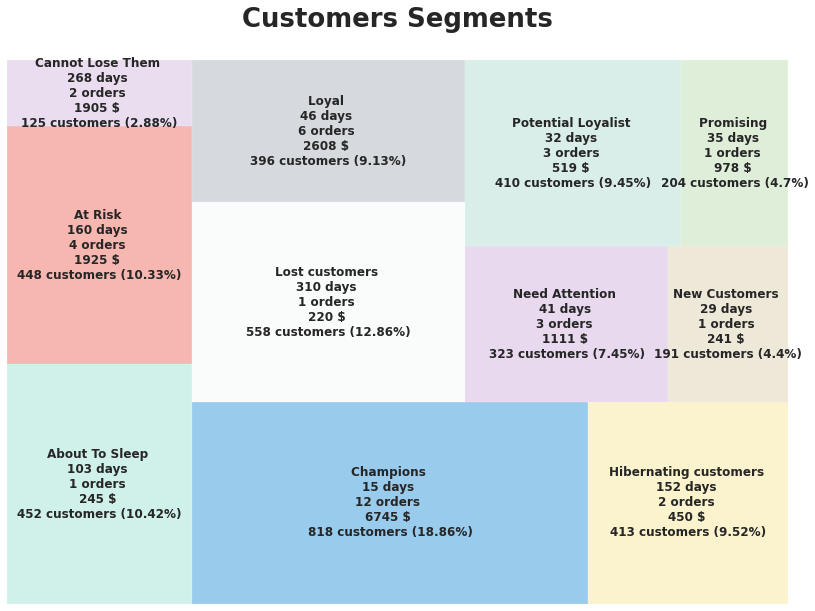

In [60]:
#Create our plot and resize it.
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(14, 10)
colors_dict = {'About To Sleep':'#A3E4D7',   
               'At Risk':'#EC7063',
               'Cannot Lose Them':'#D7BDE2',
               'Champions':'#3498DB', 
               'Hibernating customers':'#F9E79F',
               'Lost customers': '#F7F9F9',
               'Loyal': '#AEB6BF',
               'Need Attention': '#D2B4DE',
               'New Customers': '#ded2b4',
               'Potential Loyalist': '#b4ded2',
               'Promising': '#c0deb4'
              }
squarify.plot(sizes=rfm_agg['Count'],
              text_kwargs={'fontsize':12,'weight':'bold', 'fontname':"sans serif"},
              color=colors_dict.values(),
              label=['{} \n{:.0f} days \n{:.0f} orders \n{:.0f} $ \n{:.0f} customers ({}%)'.format(*rfm_agg.iloc[i])
                      for i in range(0, len(rfm_agg))], alpha=0.5 )
plt.title("Customers Segments",fontsize=26,fontweight="bold", y = 1.05)
plt.axis('off')
# plt.legend(loc='best')
plt.savefig('Image/RFM Segments.png')
plt.show()

### Scatter Plot (RFM)

In [61]:
import plotly.express as px

fig = px.scatter(rfm_agg, x="RecencyMean", y="MonetaryMean", size="FrequencyMean", color="Segment",
           hover_name="Segment", size_max=100)
fig.show()

### 3d Scatter Plot (RFM)

In [62]:
df_RFM.head()

,Recency,Frequency,Monetary,R,F,M,RFM_Segment,RFM_Score,Segment
CustomerID,,,,,,,,,
14646.0,2,73,280206.02,5,5,5,555,15,Champions
18102.0,12,60,259657.30,5,5,5,555,15,Champions
17450.0,3,46,194390.79,5,5,5,555,15,Champions
16446.0,89,2,168472.50,2,2,5,225,9,At Risk
14911.0,0,201,143711.17,5,5,5,555,15,Champions


In [63]:
import plotly.express as px

fig = px.scatter_3d(df_RFM, x='Recency', y='Frequency', z='Monetary',
                    color = 'Segment', opacity=0.5)
fig.update_traces(marker=dict(size=5),
                  
                  selector=dict(mode='markers'))
fig.show()

Customer retention plan
-----------
|Segment| Actionable Tip 
|:---|:---
| Champions  | Reward them. Can be early adopters of new products. Will promote your brand. Most likely to send referrals.
| Loyal  | Upsell higher value products. Ask for reviews.
| Potential Loyalist  | Offer membership/loyalty program. Keep them engaged. Offer personalized recommendations.
| New Customers	  |Provide onboarding support, give them early access, start building relationships.
| Promising  | Offer coupons. Bring them back to the platform and keep them engaged. Offer personalized recommendations.
|Need Attention  |  Make limited-time offers. Offer personalized recommendations.
| About To Sleep  | Make subject lines of emails very personalized. Revive their interest by a specific discount on a specific product.
| At Risk  | Provide helpful resources on the site. Send personalized emails.
| Cannot Lose Them | Win them back via renewals or newer products, don’t lose them to competition. Talk to them if necessary. Spend time on the highest possible personalization.
| Hibernating customers  | Make subject lines of emails very personalized. Revive their interest by a specific discount on a specific product.
| Lost customers  |Revive interest with reach-out campaign. Ignore otherwise.

# Kmeans clusters with the Elbow Method

In [64]:
df_new = df_RFM[['Recency','Frequency','Monetary']]
df_new.head()

,Recency,Frequency,Monetary
CustomerID,,,
14646.0,2,73,280206.02
18102.0,12,60,259657.30
17450.0,3,46,194390.79
16446.0,89,2,168472.50
14911.0,0,201,143711.17


Text(0.5, 1.0, 'Monetary')

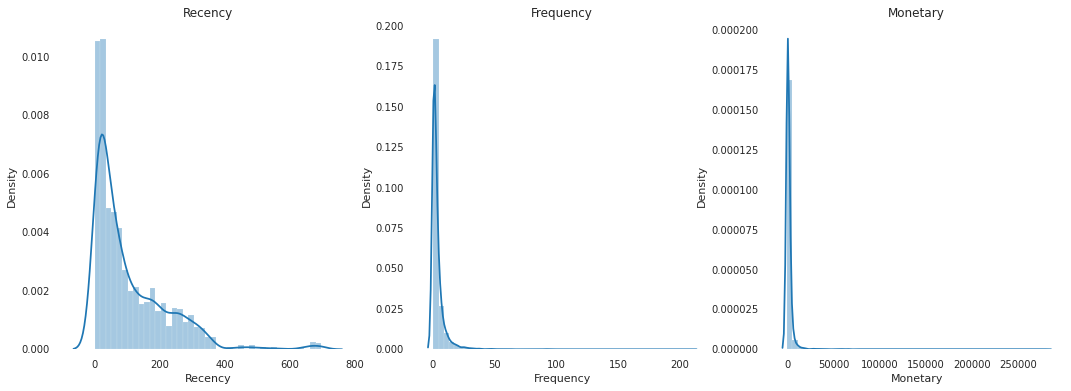

In [65]:
# Trực quan hóa
plt.figure(figsize=(18,6))
plt.subplot(1,3,1)
sns.distplot(df_new['Recency'])
plt.title('Recency')
plt.subplot(1,3,2)
sns.distplot(df_new['Frequency'])
plt.title('Frequency')
plt.subplot(1,3,3)
sns.distplot(df_new['Monetary'])
plt.title('Monetary')

In [66]:
# Kiểm tra xem giá trị nhỏ nhất của ['Recency','Frequency','Monetary']
for i in df_new.columns:
  print(df_new[i].min())

0
1
3.75


- Both ['Recency','Frequency','Monetary'] have a right skewed distribution
- ['Recency'] has min = 0, ['Frequency','Monetary'] has a positive value
=> Apply log to ['Frequency','Monetary']


In [67]:
# Sử dụng log scale cho ['Frequency','Monetary']
for i in ['Frequency','Monetary']:
  df_new['log_'+i] = np.log(df_new[i])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [68]:
df_new.head()

,Recency,Frequency,Monetary,log_Frequency,log_Monetary
CustomerID,,,,,
14646.0,2,73,280206.02,4.290459,12.543280
18102.0,12,60,259657.30,4.094345,12.467118
17450.0,3,46,194390.79,3.828641,12.177626
16446.0,89,2,168472.50,0.693147,12.034528
14911.0,0,201,143711.17,5.303305,11.875561


In [69]:
df_new_log = df_new[['Recency','log_Frequency','log_Monetary']]
df_new_log.head()

,Recency,log_Frequency,log_Monetary
CustomerID,,,
14646.0,2,4.290459,12.543280
18102.0,12,4.094345,12.467118
17450.0,3,3.828641,12.177626
16446.0,89,0.693147,12.034528
14911.0,0,5.303305,11.875561


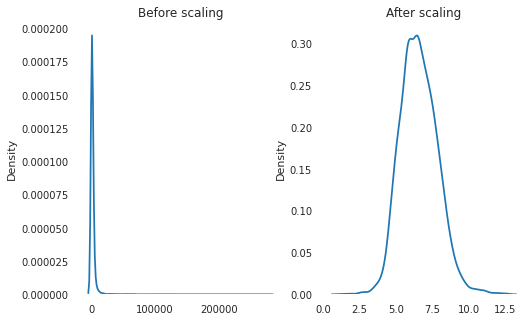

In [70]:
f, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, figsize=(8,5))
plt.xlabel('')
ax1.set_title('Before scaling')
for i in ['Monetary']:
  sns.kdeplot(df_new[i],ax = ax1, label= i)
ax1.set_xlabel('')
ax2.set_title('After scaling')
for j in ['log_Monetary']:  
  sns.kdeplot(df_new_log[j],ax = ax2, label= j)
# plt.legend(loc='upper center', bbox_to_anchor=(0.0, 1.5),
#           ncol=3, fancybox=True, shadow=True)
ax2.set_xlabel('')
plt.show()

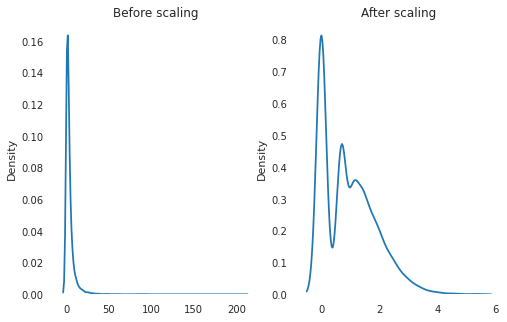

In [71]:
f, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, figsize=(8,5))
plt.xlabel('')
ax1.set_title('Before scaling')
for i in ['Frequency']:
  sns.kdeplot(df_new[i],ax = ax1, label= i)
ax1.set_xlabel('')
ax2.set_title('After scaling')
for j in ['log_Frequency']:  
  sns.kdeplot(df_new_log[j],ax = ax2, label= j)
# plt.legend(loc='upper center', bbox_to_anchor=(0.0, 1.5),
#           ncol=3, fancybox=True, shadow=True)
ax2.set_xlabel('')
plt.show()

- After applying log normalization, the two variables ['Frequency', 'Monetary'] are no longer too skewed to the right
- However, let's check the data on the chart with the same scale

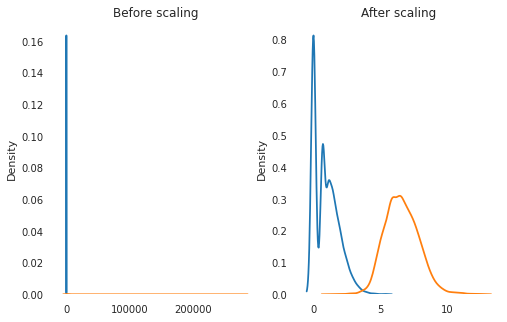

In [72]:
f, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, figsize=(8,5))
plt.xlabel('')
ax1.set_title('Before scaling')
for i in ['Frequency', 'Monetary']:
  sns.kdeplot(df_new[i],ax = ax1, label= i)
ax1.set_xlabel('')
ax2.set_title('After scaling')
for j in ['log_Frequency', 'log_Monetary']:  
  sns.kdeplot(df_new_log[j],ax = ax2, label= j)
# plt.legend(loc='upper center', bbox_to_anchor=(0.0, 1.5),
#           ncol=3, fancybox=True, shadow=True)
ax2.set_xlabel('')
plt.show()

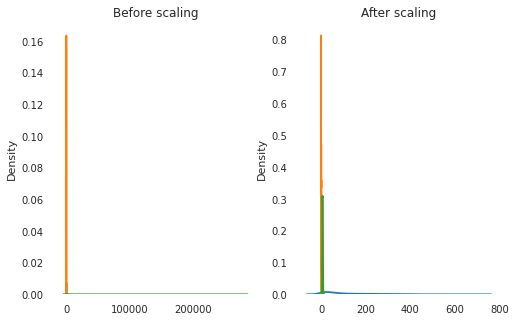

In [73]:
f, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, figsize=(8,5))
plt.xlabel('')
ax1.set_title('Before scaling')
for i in ['Recency','Frequency', 'Monetary']:
  sns.kdeplot(df_new[i],ax = ax1, label= i)
ax1.set_xlabel('')
ax2.set_title('After scaling')
for j in ['Recency','log_Frequency', 'log_Monetary']:  
  sns.kdeplot(df_new_log[j],ax = ax2, label= j)
# plt.legend(loc='upper center', bbox_to_anchor=(0.0, 1.5),
#           ncol=3, fancybox=True, shadow=True)
ax2.set_xlabel('')
plt.show()

After normalizing the log for two columns ['Frequency','Monetary'], the scale of 3 values ['Recency','log_Frequency','log_Monetary'] is not uniform.
=> Normalize RobustScaler for ['Recency','log_Frequency','log_Monetary']

In [74]:
# Chuẩn hóa dữ liệu
def chuanhoa(scale,df,lst_tencot):
    df_scale =  scale.fit_transform(df)
    df_scale = pd.DataFrame(df_scale,columns=df.columns)
    f, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, figsize=(8,5))
    plt.xlabel('')
    ax1.set_title('Before scaling')
    for i in lst_tencot:
        sns.kdeplot(df[i],ax = ax1, label= i)
    ax1.set_xlabel('')
    ax2.set_title('After scaling')
    for i in lst_tencot:  
        sns.kdeplot(df_scale[i],ax = ax2, label= i)
    ax2.set_xlabel('')
    plt.show()
    return df_scale

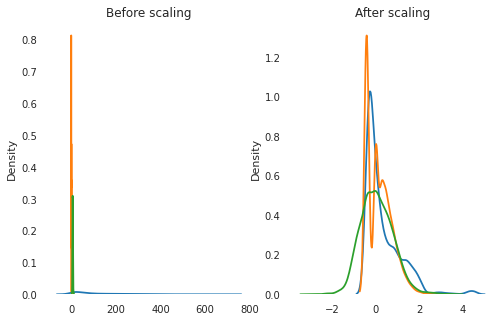

In [75]:
scale = RobustScaler()
df_now = chuanhoa(scale,df_new_log,df_new_log.columns)

- After the data scale has been uniform

In [76]:
df_now.head()

,Recency,log_Frequency,log_Monetary
0,-0.422182,2.235136,3.573345
1,-0.350626,2.113283,3.528273
2,-0.415027,1.948192,3.356953
3,0.200358,0.000000,3.272268
4,-0.436494,2.864452,3.178192


In [77]:
sse = {}
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_now)
    sse[k] = kmeans.inertia_ # SSE to closest cluster centroid

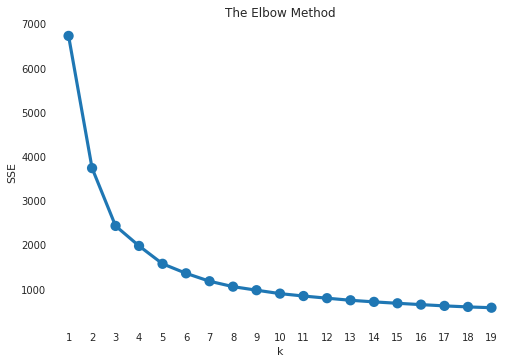

In [78]:
plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.savefig('Image/Elbow.jpg')
plt.show()

In [79]:
sil = []
K = range(2,20)
random_state = 11
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=random_state)
    kmeanModel.fit(df_now)
    labels = kmeanModel.predict(df_now)
    score = silhouette_score(df_now, labels, metric='euclidean')
    sil.append(score)

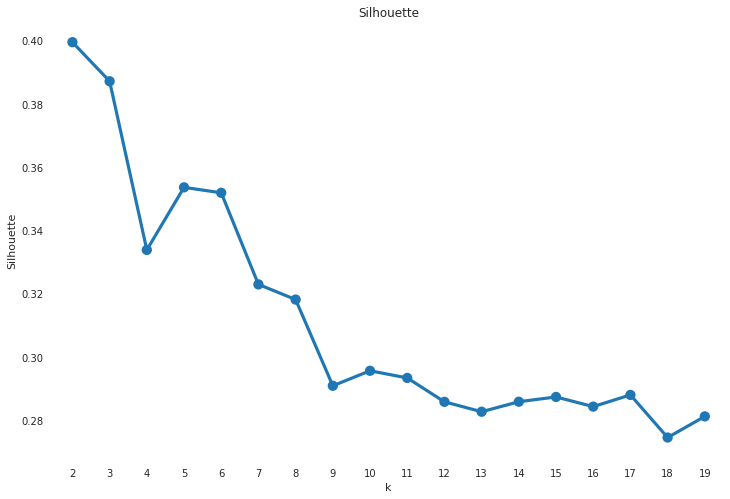

In [80]:
plt.figure(figsize=(12,8))
sns.pointplot(x=[*K], y=sil)
plt.xlabel('k')
plt.ylabel('Silhouette')
plt.title("Silhouette")
plt.savefig('Image/Silhouette.jpg')
plt.show()

- After combining both methods, choose k = 5



In [81]:
# Build model with k=5
model = KMeans(n_clusters=5, random_state=42)
model.fit(df_now)
model.labels_.shape

(4338,)

In [82]:
df_new["Cluster"] = model.labels_
df_new.groupby('Cluster').agg({
    'Recency':'mean',
    'Frequency':'mean',
    'Monetary':['mean', 'count']}).round(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Recency Frequency Monetary      
           mean      mean     mean count
Cluster                                 
0        245.14      1.41   407.19   980
1         55.44      3.88  1330.48  1490
2         62.94      1.45   324.07  1101
3         27.50     14.05  8910.70   687
4        583.00      1.48   341.18    80

In [83]:

# Calculate average values for each RFM_Level, and return a size of each segment 
rfm_agg2 = df_new.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': ['mean', 'count']}).round(0)

rfm_agg2.columns = rfm_agg2.columns.droplevel()
rfm_agg2.columns = ['RecencyMean','FrequencyMean','MonetaryMean', 'Count']
rfm_agg2['Percent'] = round((rfm_agg2['Count']/rfm_agg2.Count.sum())*100, 2)

# Reset the index
rfm_agg2 = rfm_agg2.reset_index()

# Change thr Cluster Columns Datatype into discrete values
rfm_agg2['Cluster'] = 'Cluster '+ rfm_agg2['Cluster'].astype('str')

# Print the aggregated dataset
rfm_agg2

,Cluster,RecencyMean,FrequencyMean,MonetaryMean,Count,Percent
0,Cluster 0,245.0,1.0,407.0,980,22.59
1,Cluster 1,55.0,4.0,1330.0,1490,34.35
2,Cluster 2,63.0,1.0,324.0,1101,25.38
3,Cluster 3,27.0,14.0,8911.0,687,15.84
4,Cluster 4,583.0,1.0,341.0,80,1.84


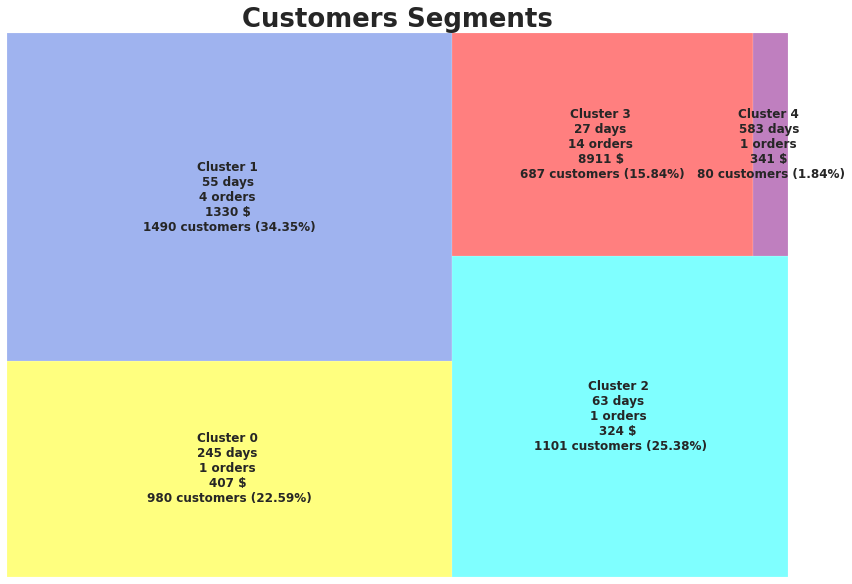

In [84]:
#Create our plot and resize it.
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(14, 10)

colors_dict2 = {'Cluster0':'yellow','Cluster1':'royalblue', 'Cluster2':'cyan',
               'Cluster3':'red', 'Cluster4':'purple'}
              #  , 'Cluster5':'green', 'Cluster6':'gold'}

squarify.plot(sizes=rfm_agg2['Count'],
              text_kwargs={'fontsize':12,'weight':'bold', 'fontname':"sans serif"},
              color=colors_dict2.values(),
              # label=['{}'.format(*rfm_agg2.iloc[i])
              #         for i in range(0, len(rfm_agg2))], alpha=0.5 )
              label=['{} \n{:.0f} days \n{:.0f} orders \n{:.0f} $ \n{:.0f} customers ({}%)'.format(*rfm_agg2.iloc[i])
                      for i in range(0, len(rfm_agg2))], alpha=0.5 )


plt.title("Customers Segments",fontsize=26,fontweight="bold")
plt.axis('off')

plt.savefig('Image/Unsupervised Segments KMean.png')
plt.show()


In [85]:
fig = px.scatter_3d(rfm_agg2, x='RecencyMean', y='FrequencyMean', z='MonetaryMean',
                    color = 'Cluster', opacity=0.3)
fig.update_traces(marker=dict(size=20),
                  
                  selector=dict(mode='markers'))
fig.show()

- Cluster 0: ABOUT TO SLEEP CUSTOMER
  - Haven’t returned for a long time, However, they pay quite a lot of money
  - => Provide helpful resources on the site. Send personalized emails.
- Cluster 1: LOYAL CUSTOMERS:
  - Orders regularly. Responsive to promotions.
  - => Upsell higher value products. Ask for reviews.
- Cluster 2: AT RISK CUSTOMER
  - haven't come back for a long time
  - => Provide helpful resources on the site. Send personalized emails.
- Cluster 3: CHAMPIONS:
  - 	Bought recently, order often, and spend the most
  - => Reward them. Can be early adopters of new products. Will promote your brand. Most likely to send referrals.
- Cluster 4: LOST 
  - Made last purchase a long time ago and didn’t engage.
  - => Revive interest with reach-out campaign. Ignore otherwise.

# Hierarchical

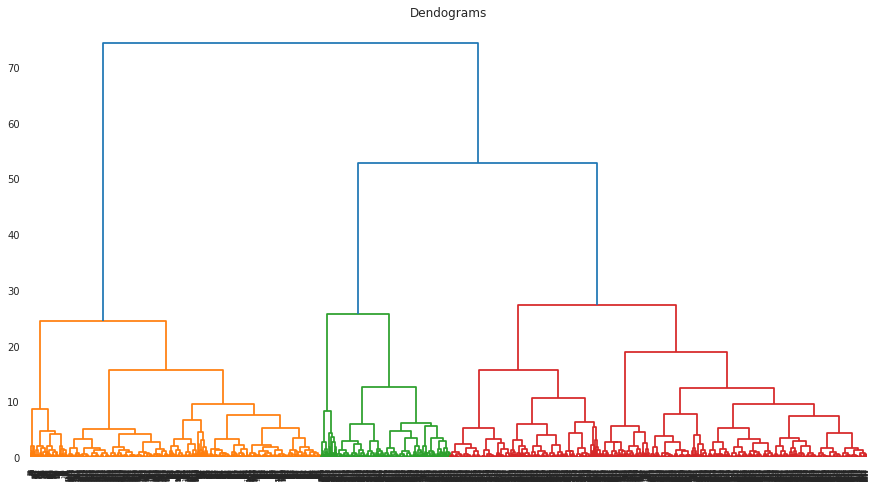

In [86]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(15, 8))
plt.title("Dendograms") 
dend = shc.dendrogram(shc.linkage(df_now, method='ward'))
plt.savefig('Image/Dendograms.jpg')

In [87]:
# cluster = 5
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean') 
cluster.fit(df_now)

AgglomerativeClustering(n_clusters=5)

In [88]:
cluster.labels_

array([0, 0, 0, ..., 1, 1, 1])

In [89]:
df_new["Cluster_Hier"] = cluster.labels_
df_new.groupby('Cluster_Hier').agg({
    'Recency':'mean',
    'Frequency':'mean',
    'Monetary':['mean', 'count']}).round(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Recency Frequency Monetary      
                mean      mean     mean count
Cluster_Hier                                 
0              31.95      8.91  4928.18  1507
1             114.65      1.21   218.23   787
2              77.43      2.38   742.26  1375
3             282.16      1.28   408.81   589
4             583.00      1.48   341.18    80

In [90]:
# Calculate average values for each RFM_Level, and return a size of each segment 
rfm_agg2_Hier = df_new.groupby('Cluster_Hier').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': ['mean', 'count']}).round(0)

rfm_agg2_Hier.columns = rfm_agg2_Hier.columns.droplevel()
rfm_agg2_Hier.columns = ['RecencyMean','FrequencyMean','MonetaryMean', 'Count']
rfm_agg2_Hier['Percent'] = round((rfm_agg2_Hier['Count']/rfm_agg2_Hier.Count.sum())*100, 2)

# Reset the index
rfm_agg2_Hier = rfm_agg2_Hier.reset_index()

# Change thr Cluster Columns Datatype into discrete values
rfm_agg2_Hier['Cluster_Hier'] = 'Cluster '+ rfm_agg2_Hier['Cluster_Hier'].astype('str')

# Print the aggregated dataset
rfm_agg2_Hier

,Cluster_Hier,RecencyMean,FrequencyMean,MonetaryMean,Count,Percent
0,Cluster 0,32.0,9.0,4928.0,1507,34.74
1,Cluster 1,115.0,1.0,218.0,787,18.14
2,Cluster 2,77.0,2.0,742.0,1375,31.70
3,Cluster 3,282.0,1.0,409.0,589,13.58
4,Cluster 4,583.0,1.0,341.0,80,1.84


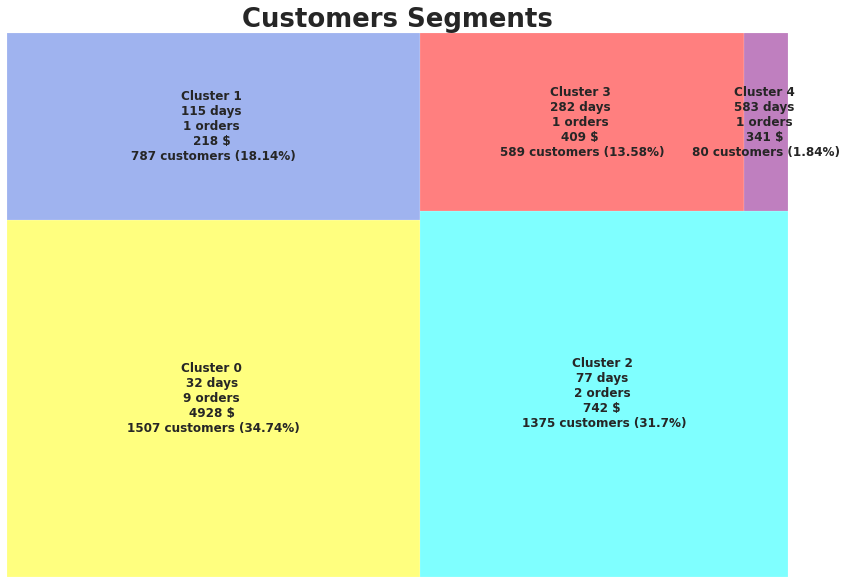

In [91]:
#Create our plot and resize it.
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(14, 10)

colors_dict2 = {'Cluster0':'yellow','Cluster1':'royalblue', 'Cluster2':'cyan',
               'Cluster3':'red', 'Cluster4':'purple', 'Cluster5':'green', 'Cluster6':'gold'}

squarify.plot(sizes=rfm_agg2_Hier['Count'],
              text_kwargs={'fontsize':12,'weight':'bold', 'fontname':"sans serif"},
              color=colors_dict2.values(),
              # label=['{}'.format(*rfm_agg2_Hier.iloc[i])
              #         for i in range(0, len(rfm_agg2_Hier))], alpha=0.5 )
              label=['{} \n{:.0f} days \n{:.0f} orders \n{:.0f} $ \n{:.0f} customers ({}%)'.format(*rfm_agg2_Hier.iloc[i])
                      for i in range(0, len(rfm_agg2_Hier))], alpha=0.5 )


plt.title("Customers Segments",fontsize=26,fontweight="bold")
plt.axis('off')

plt.savefig('Image/Unsupervised Segments Hier.png')
plt.show()


In [92]:
fig = px.scatter_3d(rfm_agg2_Hier, x='RecencyMean', y='FrequencyMean', z='MonetaryMean',
                    color = 'Cluster_Hier', opacity=0.3)
fig.update_traces(marker=dict(size=20),
                  
                  selector=dict(mode='markers'))
fig.show()

- Cluster 0: CHAMPIONS:
  - 	Bought recently, order often, and spend the most
  - => Reward them. Can be early adopters of new products. Will promote your brand. Most likely to send referrals.
- Cluster 1: AT RISK CUSTOMER
  - haven't come back for a long time
  - => Provide helpful resources on the site. Send personalized emails.
- Cluster 2: LOYAL CUSTOMERS:
  - Orders regularly. Responsive to promotions.
  - => Upsell higher value products. Ask for reviews.
- Cluster 3: ABOUT TO SLEEP CUSTOMER
  - Haven’t returned for a long time, However, they pay quite a lot of money
  - => Provide helpful resources on the site. Send personalized emails.
- Cluster 4: LOST 
  - Made last purchase a long time ago and didn’t engage.
  - => Revive interest with reach-out campaign. Ignore otherwise.

# Save model

In [93]:
import pickle

In [94]:
pkl_filename = 'Model/Kmean_model.pkl'
with open(pkl_filename, 'wb') as file:
    pickle.dump(model,file)

In [95]:
pkl_filename = 'Model/Hierarchical_model.pkl'
with open(pkl_filename, 'wb') as file:
    pickle.dump(cluster,file)